In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.pyplot as plt


In [24]:
#overdoses = pd.read_excel('https://www.drugabuse.gov/sites/default/files/overdose_data_1999-2015.xls',sheetname='Online',skiprows =6)
#################################
#this will take sometime to read.
#################################
overdoses = pd.read_excel('overdose_data_1999-2015.xls',skiprows =6)
overdoses.head()

,Unnamed: 0,Unnamed: 1,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,NaN,Total Overdose Deaths,16849.0,17415.0,19394.0,23518.0,25785.0,27424.0,29813.0,34425.0,36010.0,36450.0,37004.0,38329.0,41340.0,41502.0,43982.0,47055.0,52404.0
1,NaN,Female,5591.0,5852.0,6736.0,8490.0,9386.0,10304.0,11089.0,12532.0,13712.0,13982.0,14411.0,15323.0,16352.0,16390.0,17183.0,18243.0,19447.0
2,NaN,Male,11258.0,11563.0,12658.0,15028.0,16399.0,17120.0,18724.0,21893.0,22298.0,22468.0,22593.0,23006.0,24988.0,25112.0,26799.0,28812.0,32957.0
3,NaN,Prescription Drugs1,7523.0,7885.0,9197.0,11529.0,12640.0,14153.0,15352.0,18559.0,19601.0,20044.0,20848.0,22134.0,22810.0,22114.0,22767.0,25760.0,29728.0
4,NaN,Female,3011.0,3196.0,3790.0,4765.0,5191.0,5980.0,6351.0,7553.0,8251.0,8275.0,8740.0,9292.0,9771.0,9632.0,10019.0,11181.0,12218.0


In [16]:
def get_data(table,rownum,title):
    data = pd.DataFrame(table.loc[rownum][2:]).astype(float)
    data.columns = {title}
    return data

In [17]:
%matplotlib notebook
title = 'Heroin Overdoses'
d = get_data(overdoses,18,title)
x = np.array(d.index)
y = np.array(d['Heroin Overdoses'])
overdose = pd.DataFrame(y,x)
#XN,YN = augment(x,y,10)
#augmented = pd.DataFrame(YN,XN)
overdose.columns = {title}

In [27]:
overdose.describe()

,Heroin Overdoses
count,17.000000
mean,4095.352941
std,3391.130065
min,1779.000000
25%,2009.000000
50%,2399.000000
75%,4397.000000
max,12989.000000


In [28]:
#Writer = animation.writers['ffmpeg']
Writer = animation.writers['pillow']

writer = Writer(fps=20, metadata=dict(artist='Me'), bitrate=1800)

<IPython.core.display.Javascript object>


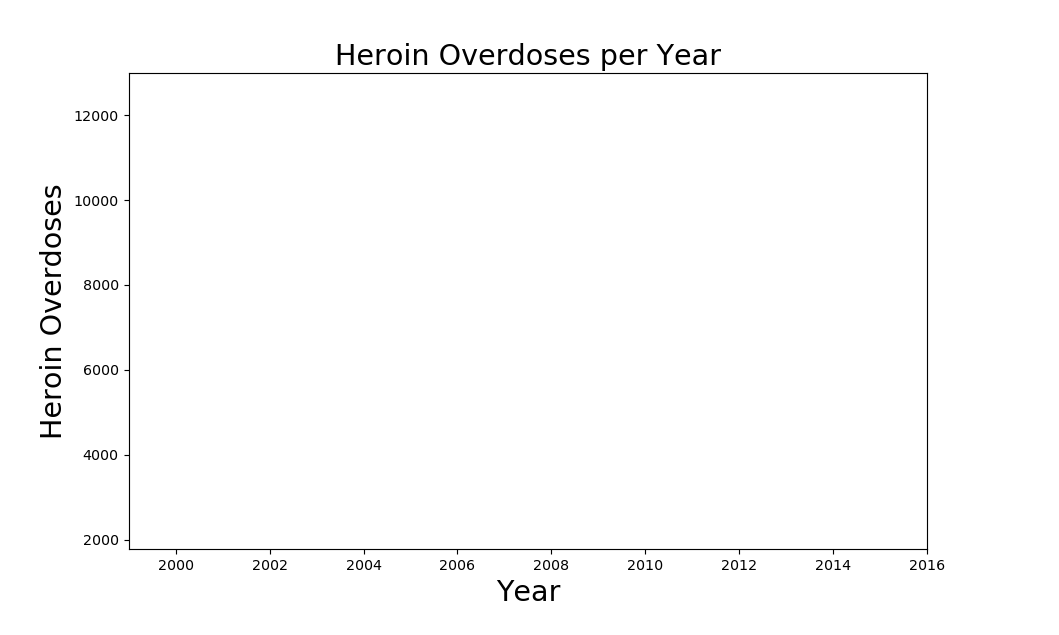

Text(0.5, 1.0, 'Heroin Overdoses per Year')

In [29]:
fig = plt.figure(figsize=(10,6))
plt.xlim(1999, 2016)
plt.ylim(np.min(overdose)[0], np.max(overdose)[0])
plt.xlabel('Year',fontsize=20)
plt.ylabel(title,fontsize=20)
plt.title('Heroin Overdoses per Year',fontsize=20)

In [21]:
def animate(i):
    data = overdose.iloc[:int(i+1)] #select data range
    p = sns.lineplot(x=data.index, y=data[title], data=data, color="r")
    p.tick_params(labelsize=17)
    plt.setp(p.lines,linewidth=7)

In [22]:
ani = matplotlib.animation.FuncAnimation(fig, animate, frames=17, repeat=True)

In [23]:
ani.save('HeroinOverdosesJumpy.mp4', writer=writer)

IndexError: list index out of range

In [ ]:
def augment(xold,yold,numsteps):
    xnew = []
    ynew = []
    for i in range(len(xold)-1):
        difX = xold[i+1]-xold[i]
        stepsX = difX/numsteps
        difY = yold[i+1]-yold[i]
        stepsY = difY/numsteps
        for s in range(numsteps):
            xnew = np.append(xnew,xold[i]+s*stepsX)
            ynew = np.append(ynew,yold[i]+s*stepsY)
    return xnew,ynew

In [ ]:
def smoothListGaussian(listin,strippedXs=False,degree=5):  
    window=degree*2-1  
    weight=np.array([1.0]*window)  
    weightGauss=[]  
    for i in range(window):  
        i=i-degree+1  
        frac=i/float(window)  
        gauss=1/(np.exp((4*(frac))**2))  
        weightGauss.append(gauss)
    weight=np.array(weightGauss)*weight  
    smoothed=[0.0]*(len(listin)-window)  
    for i in range(len(smoothed)):        smoothed[i]=sum(np.array(listin[i:i+window])*weight)/sum(weight)  
    return smoothed

In [ ]:
sns.set(rc={'axes.facecolor':'lightgrey', 'figure.facecolor':'lightgrey','figure.edgecolor':'black','axes.grid':False})